In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/mri-and-alzheimers/oasis_longitudinal.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import datset
import seaborn as sns
sns.set()
df=pd.read_csv('../input/mri-and-alzheimers/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
#a brief discription of dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
#convert the categorical data(like male female to 1 and 0 respectively) to numerical form for the model to train
df=df.loc[df['Visit']==1]
df=df.reset_index(drop=True)
df['M/F']=df['M/F'].replace(['F','M'],[0,1])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group']=df['Group'].replace(['Nondemented','Demented'],[0,1])
df['Hand']=df['Hand'].replace(['R'],[1])
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,0,1,0,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,0,1,0,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [5]:
#check for any null values in dataset
pd.isnull(df).sum() 

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [6]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,0,1,0,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,0,1,0,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [7]:
#replace the null values with the mean value of the coloumn
df['SES'].fillna((df['SES'].mean()), inplace=True)

In [8]:
#verify that the null values have been replaced
print(pd.isnull(df).sum())
df.head()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.492958,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,0,1,0,0,1,88,18,3.000000,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,0,1,0,1,1,80,12,4.000000,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,1,71,16,2.492958,28.0,0.5,1357,0.748,1.293


In [9]:
#Feature Selection
# method 1: use the 'SelectKBest' class to analayse for 10 best features to use in model training
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X =df[['Visit','MR Delay','M/F','Hand','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']]  #independent columns
y = df['Group']    #target column i.e demented or non demented
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Features      Score
8       CDR  36.000000
7      MMSE  13.421167
2       M/F   3.891232
5      EDUC   3.821454
9      eTIV   3.034464
6       SES   0.323267
10     nWBV   0.019006
11      ASF   0.001072
4       Age   0.000476
0     Visit   0.000000


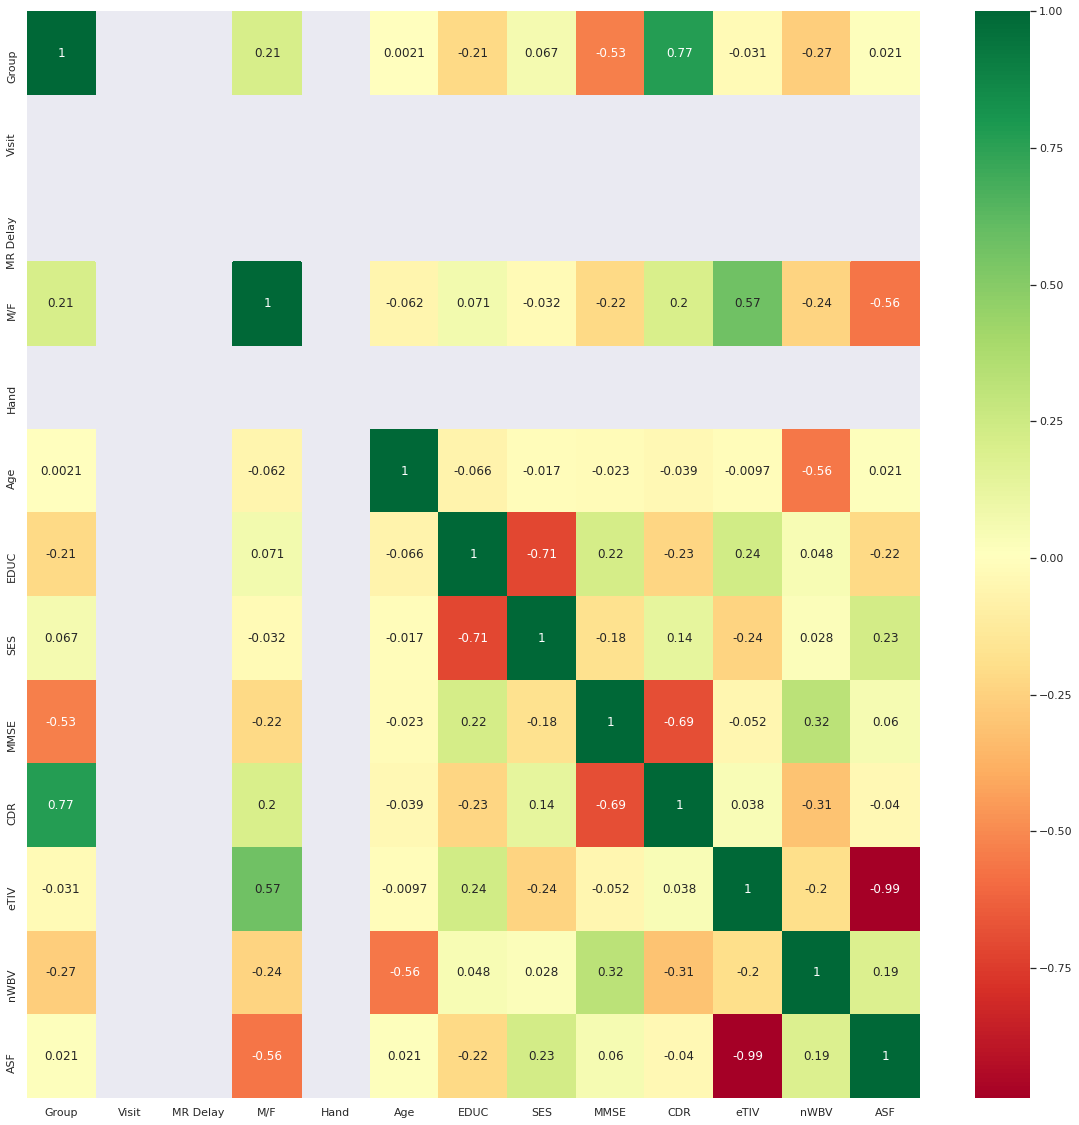

In [10]:
# method 2: plot a heat map to see which features correlate the most with the target variable 'Group'
import matplotlib.pyplot as plt
X =df[['Visit','MR Delay','M/F','Hand','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']]  #independent columns
y = df['Group']    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
useful_features=df[['CDR','MMSE','nWBV', 'ASF','M/F','EDUC','eTIV']] #'SES', 'nWBV' 'ASF'

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(useful_features, y, test_size=0.5, random_state=0)

In [13]:
#import xgboost as xgb
#param = {
 #   'eta': 0.3, 
#    'max_depth': 8,  
 #   'objective': 'multi:softprob',  
  #  'num_class': 3} 

#steps = 20
#D_train = xgb.DMatrix(X_train, label=y_train)
#model = xgb.train(param, D_train, steps)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=9, criterion='gini')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8933333333333333


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred, labels=[1,0]))
confusion= pd.DataFrame(cm,index=['has_alzheimer', 'no_alzheimer'], columns=['predicted_alzheimer','predicted_healthy'])
print(confusion)
print(classification_report(y_test,y_pred))

               predicted_alzheimer  predicted_healthy
has_alzheimer                   37                  5
no_alzheimer                     3                 30
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.93      0.88      0.90        42

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75

